# Milestone 2

URL Deployment : [Milestone 2 Heroku](https://anugrah-yoga-ftds10-p1m2.herokuapp.com/)

### Objective
* Mampu memahami konsep supervised learning dan unsupervised learning
* Mampu mempersiapkan data untuk digunakan dalam model supervised learning dan unsupervised learning
* Mampu mengimplementasikan supervised learning dan unsupervised learning dengan dataset yang baru
* Mampu melakukan evaluasi model
* Mampu melakukan model tuning
* Mampu melakukan model deployment

## I. Perkenalan
* Nama : Anugrah Yoga P
* Batch : FTDS-010
* Dataset : [kc_house_data.csv](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
```
Tentang dataset  : House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.
    - id : Unique ID for each home sold
    - date : Date of the home sale
    - price : Price of each home sold
    - bedrooms : Number of bedrooms
    - bathrooms : Number of bathrooms, where .5 accounts for a room with a toilet but no shower
    - sqft_living : Square footage of the apartments interior living space
    - sqft_lot : Square footage of the land space
    - floors : Number of floors
    - waterfront : A dummy variable for whether the apartment was overlooking the waterfront or not
    - view : An index from 0 to 4 of how good the view of the property was
    - condition : An index from 1 to 5 on the condition of the apartment,
    - grade : An index from 1 to 13, where 1:3 falls short of building construction and design, 7 has an average level of construction and design, and 11:13 have a high quality level of construction and design.
    - sqft_above : The square footage of the interior housing space that is above ground level
    - sqft_basement : The square footage of the interior housing space that is below ground level
    - yr_built : The year the house was initially built
    - yr_renovated : The year of the house’s last renovation
    - zipcode : What zipcode area the house is in
    - lat : Lattitude
    - long : Longitude
    - sqft_living15 : The square footage of interior housing living space for the nearest 15 neighbors
    - sqft_lot15 : The square footage of the land lots of the nearest 15 neighbors
```


## II. Import Pustaka

Import pustaka.

In [1]:
import warnings
import math as m
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.core.common import SettingWithCopyWarning
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

## III. Data Loading

Load data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
data = df.copy()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Cek ukuran dataset.

In [3]:
print(f'Ukuran dari dataset adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

Ukuran dari dataset adalah 21613 baris dan 21 kolom


Cek informasi dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Tidak terdapat missing value.

Ubah tipe data date menjadi datetime.

In [5]:
data['date'] = pd.to_datetime(data['date'])

## IV. Exploratory Data Analysis

Melihat jumlah nilai unik di setiap fitur.

In [47]:
data.nunique().sort_values(ascending=False).head()

id            21436
sqft_lot       9782
sqft_lot15     8689
lat            5034
price          4028
dtype: int64

> Ternyata fitur id tidak memiliki jumlah unik yang sama dengan panjang data yaitu 21613 baris melainkan lebih sedikit. Hal ini bisa saja terdapat data duplikat. Coba kita cek lebih lanjut.

In [48]:
multi_id = data['id'].value_counts()[data['id'].value_counts() > 1] # membuat daftar id yang memiliki value unik lebih dari 1
data[data['id'].isin(multi_id.index)].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,4.3e+05,3,1.5,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.7,-122.4,1570,4500
94,6021501535,2014-12-23,7.0e+05,3,1.5,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.7,-122.4,1570,4500
313,4139480200,2014-06-18,1.4e+06,4,3.2,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.6,-122.1,3860,11244
314,4139480200,2014-12-09,1.4e+06,4,3.2,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.6,-122.1,3860,11244
324,7520000520,2014-09-05,2.3e+05,2,1.0,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.5,-122.4,1820,7460


> Ternyata terlihat bahwa id yang sama menandakan rumah yang sama tetapi terjual pada waktu (date) yang berbeda. Hal ini bermakna rumah dengan id terkait diperjual belikan lebih dari 1 kali.

### Korelasi

Cek korelasi antar fitur.

Text(0.5, 1.0, 'Korelasi antar fitur numerik')

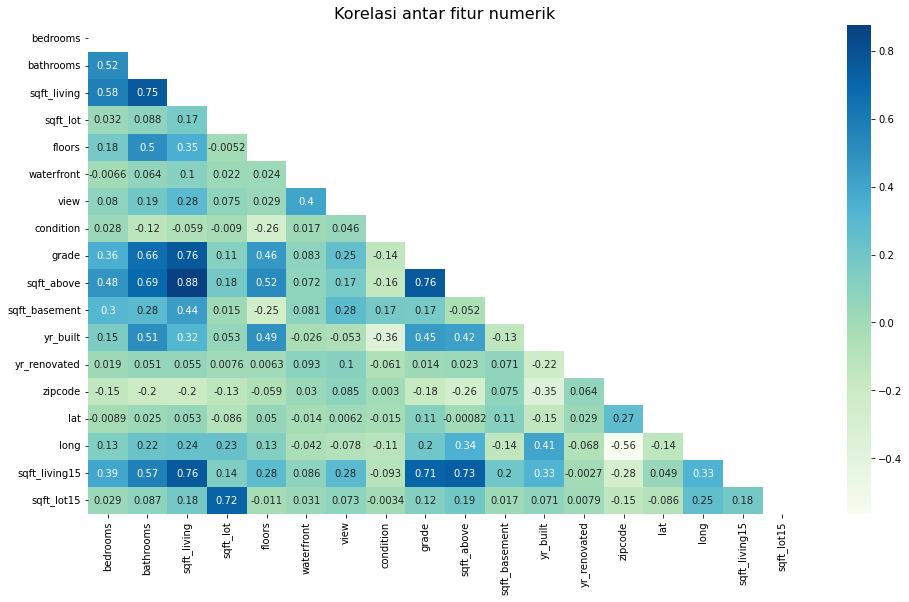

In [49]:
plt.figure(figsize=(16, 9))
mask = np.triu(np.ones_like(data.drop(['id', 'price'], axis=1).corr()))
sns.heatmap(data.drop(['id', 'price'], axis=1).corr(), mask=mask, annot=True ,cmap='GnBu')
plt.title('Korelasi antar fitur numerik', fontsize=16)

> Korelasi di atas menunjukkan beberapa fitur yang berkorelasi dengan fitur lainnya seperti bedrooms, bathrooms, soft_ living, sqft_lot, grade, sqft_above dan lainnya.

Kita ingin lihat korelasi target price dengan semua fiturnya.

<AxesSubplot:title={'center':'Korelasi Label Price dengan Fitur'}>

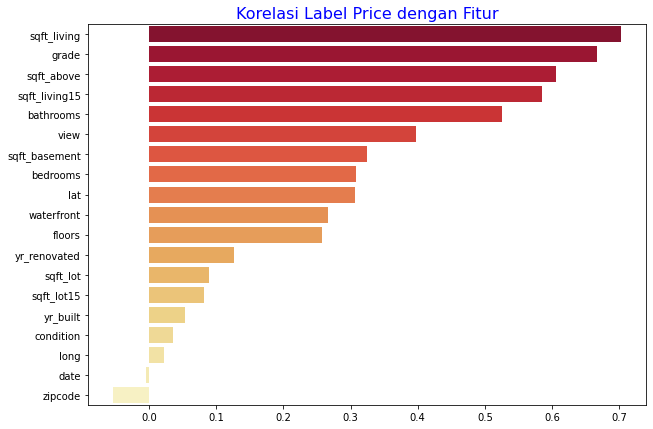

In [50]:
data_corr = data.copy()
data_corr['date'] = data_corr['date'].apply(lambda x: x.toordinal())
price_corr = data_corr.drop('id', axis=1).corr()['price'].sort_values(ascending=False).iloc[1:]

plt.figure(figsize=(10, 7))
plt.title('Korelasi Label Price dengan Fitur', fontsize=16, color='b')
sns.barplot(y=price_corr.index, x=price_corr.values, orient='h', palette='YlOrRd_r')

> Fitur dengan 3 korelasi terbesar adalah sqft_living, grade, dan sqft_above.

Kita cek ringkasan deskripsi data.

In [51]:
pd.set_option("display.precision", 1)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.2e+04,2.2e+04,21613.0,21613.0,21613.0,2.2e+04,21613.0,2.2e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.6e+09,5.4e+05,3.4,2.1,2079.9,1.5e+04,1.5,7.5e-03,0.2,3.4,7.7,1788.4,291.5,1971.0,84.4,98077.9,47.6,-122.2,1986.6,12768.5
std,2.9e+09,3.7e+05,0.9,0.8,918.4,4.1e+04,0.5,8.7e-02,0.8,0.7,1.2,828.1,442.6,29.4,401.7,53.5,0.1,0.1,685.4,27304.2
min,1.0e+06,7.5e+04,0.0,0.0,290.0,5.2e+02,1.0,0.0e+00,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.2,-122.5,399.0,651.0
25%,2.1e+09,3.2e+05,3.0,1.8,1427.0,5.0e+03,1.0,0.0e+00,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.5,-122.3,1490.0,5100.0
50%,3.9e+09,4.5e+05,3.0,2.2,1910.0,7.6e+03,1.5,0.0e+00,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,47.6,-122.2,1840.0,7620.0
75%,7.3e+09,6.4e+05,4.0,2.5,2550.0,1.1e+04,2.0,0.0e+00,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,47.7,-122.1,2360.0,10083.0
max,9.9e+09,7.7e+06,33.0,8.0,13540.0,1.7e+06,3.5,1.0e+00,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.8,-121.3,6210.0,871200.0


Terdapat fitur-fitur kategorik yang sudah menjadi numerik. Kemudian dibuat nama-nama fitur kategori.

In [52]:
data_mean = data.describe().loc['mean']
data_median = data.describe().loc['50%']
cat_col = data_median[
    (data_median >= 0) & 
    (data_median < 10) & 
    (data_mean < 10)
].index.to_list()

Cek nilai unique dari fitur kategori.

In [53]:
for cat in cat_col:
    print(f'{cat} : {sorted(data[cat].unique())}')

bedrooms : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]
bathrooms : [0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]
floors : [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
waterfront : [0, 1]
view : [0, 1, 2, 3, 4]
condition : [1, 2, 3, 4, 5]
grade : [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [129]:
def histogram(dataseries, color):
    plt.subplot(2, 1, 1)
    sns.histplot(dataseries, bins=15, color=color, kde=True)
    plt.title(f'Distribusi Data {dataseries.name}')
    plt.xlabel(dataseries.name)
    plt.ylabel('Frequency')
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())    

def boxplot(dataseries, color):
    plt.subplot(2, 1, 2)
    sns.boxplot(dataseries, orient='h', color=color)
    plt.xlim(xmin=dataseries.min(), xmax=dataseries.max())
    plt.show()

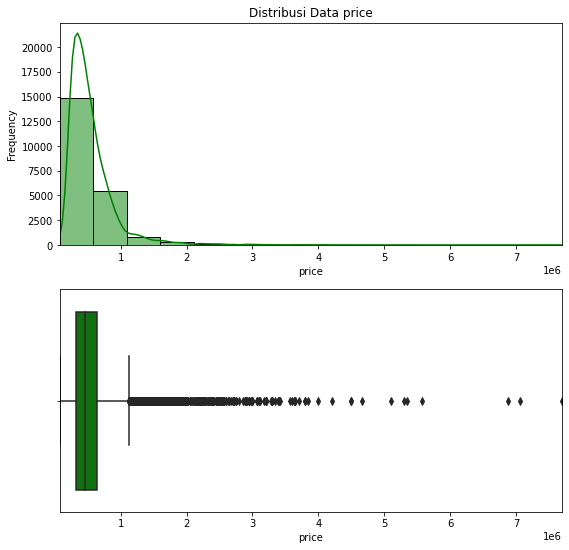

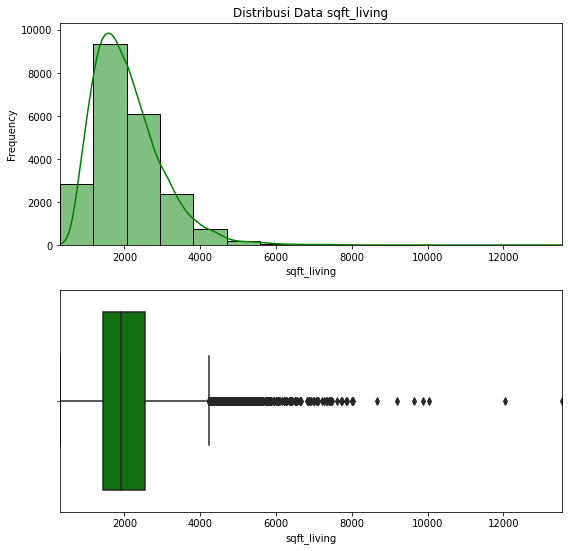

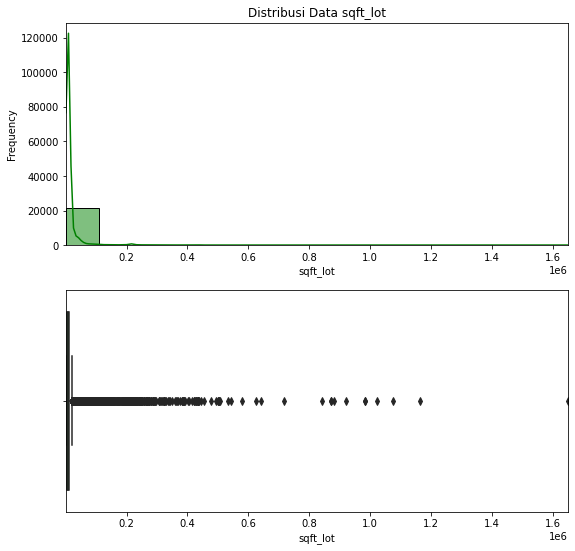

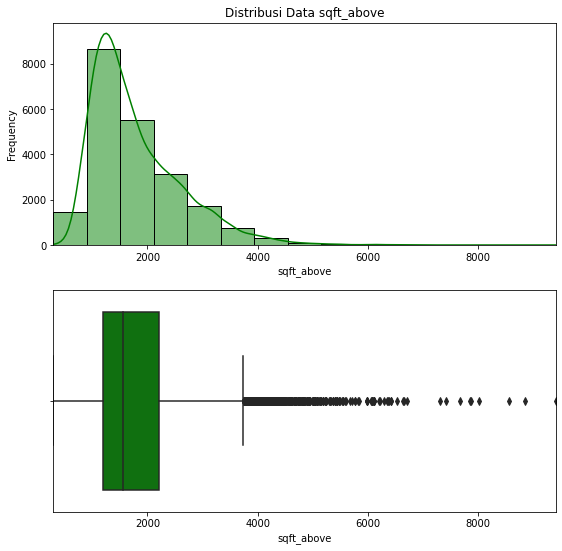

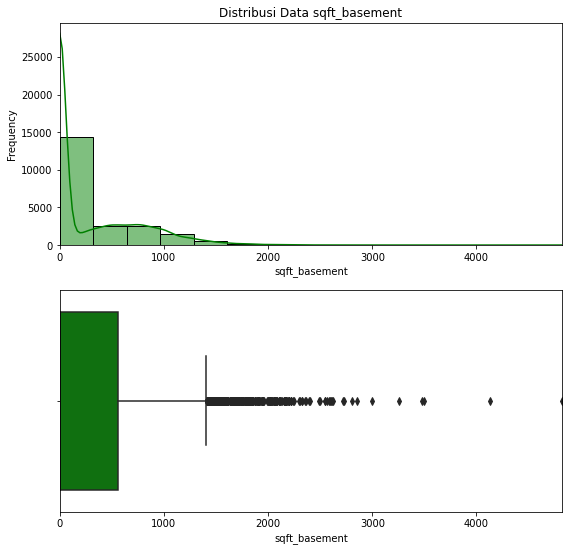

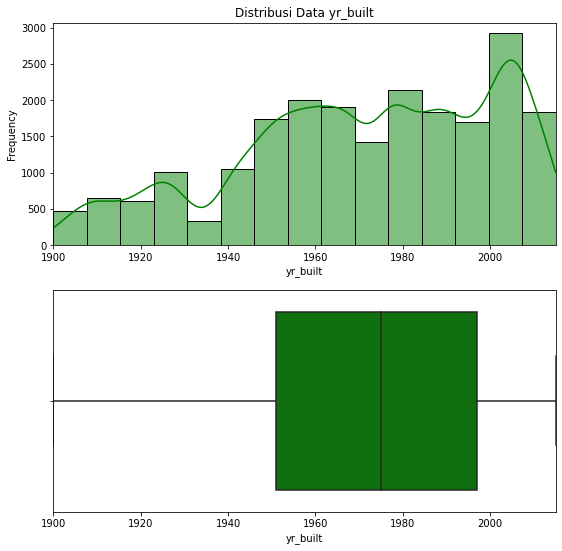

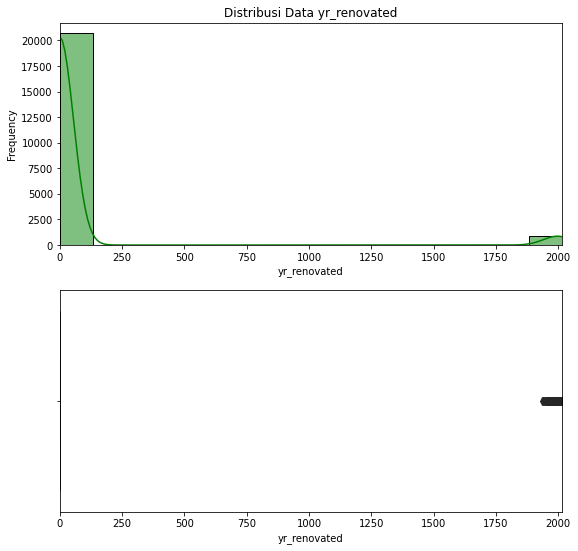

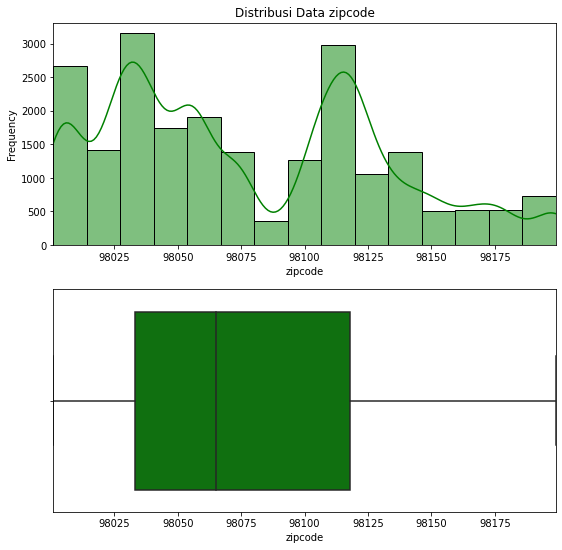

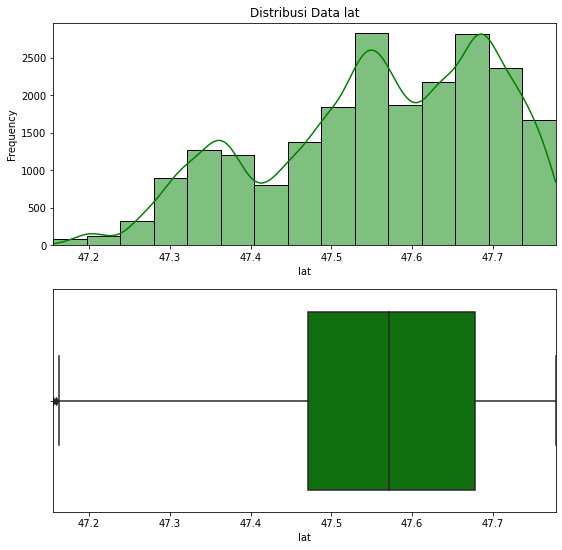

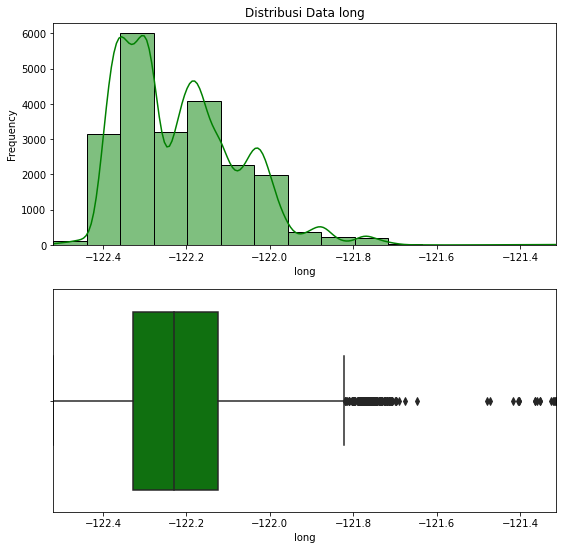

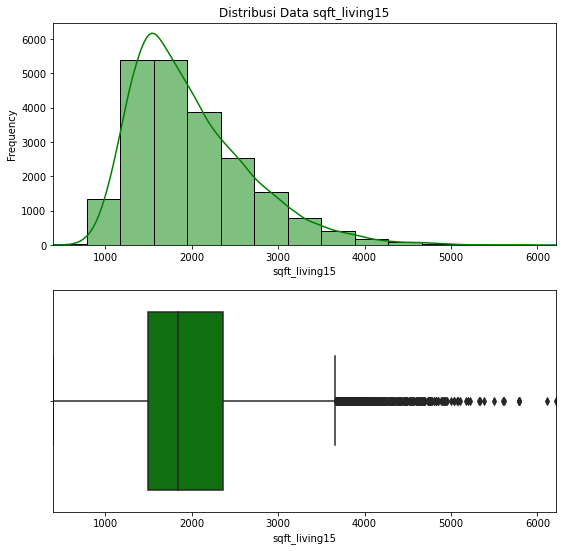

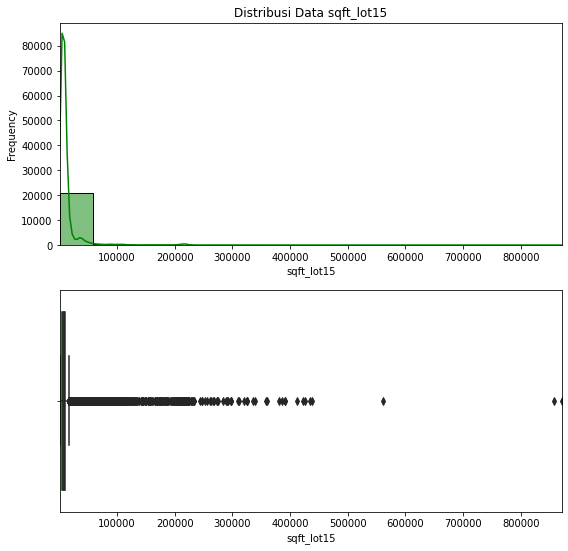

In [130]:
for col in data.columns:
    if (col not in cat_col) & (col not in ['id', 'date']):
        warnings.simplefilter(action='ignore', category=FutureWarning)
        plt.figure(figsize=(9, 9))
        histogram(data[col], 'g')
        boxplot(data[col], 'g')


> Mayoritas distribusinya adalah skew dengan banyak outlier. Coba kita hitung jumlah outliernya.

In [131]:
# fungsi mengeluarkan upper lower dari outlier
def outlier(datacol):
    q1, q3 = datacol.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    return lower, upper

# fungsi menghitung persentase outlier
def outlier_pct(datacol):
    lower = outlier(datacol)[0]
    upper = outlier(datacol)[1]
    outlier_data = datacol[((datacol < lower) | (datacol > upper))] # data outlier
    len_out = len(outlier_data) # jumlah data outlier
    len_data = len(datacol) # jumlah semua data
    return len_out/len_data*100

In [132]:
for col in data.columns:
    if (col not in cat_col) & (col not in ['id', 'date']):
        print(f'{col}   : {outlier_pct(data[col]):.2f}%')

price   : 5.30%
sqft_living   : 2.65%
sqft_lot   : 11.22%
sqft_above   : 2.83%
sqft_basement   : 2.29%
yr_built   : 0.00%
yr_renovated   : 4.23%
zipcode   : 0.00%
lat   : 0.01%
long   : 1.18%
sqft_living15   : 2.52%
sqft_lot15   : 10.15%


Nilai kategori yang memiliki *floating point* misalnya 2.5 menandakan bahwa nominal sebenarnya 3 namun terdapat fitur rumah terkait yang kurang sehingga diberi 2.5.

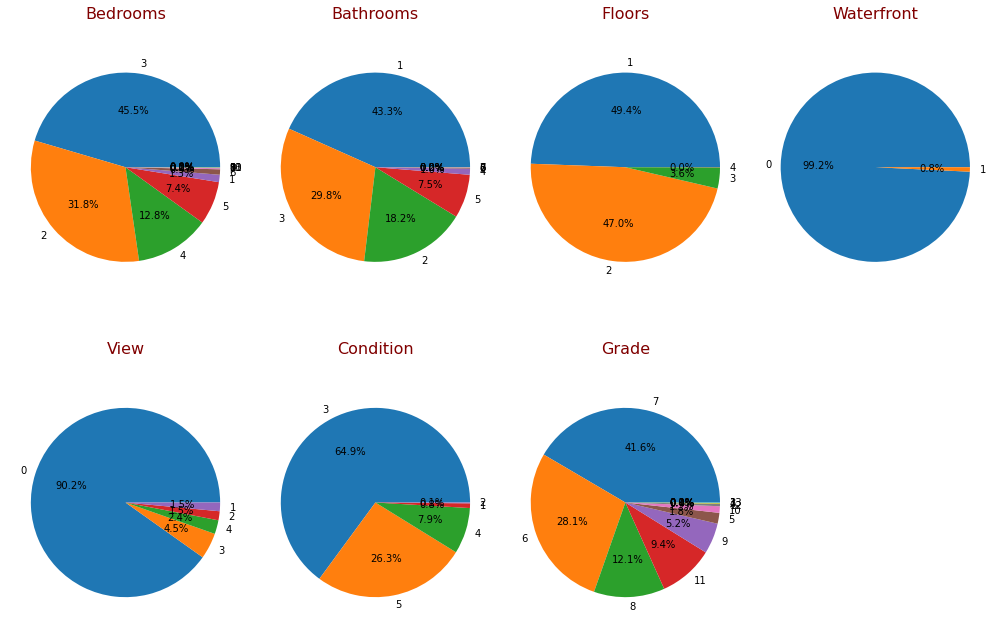

In [59]:
plt.figure(figsize=(14, 10))
less_unique = cat_col
for i, col in enumerate(less_unique):
    plt.subplot(len(less_unique)//4+1, 4, i+1)
    plt.title(f'{col.capitalize()}', loc='center', pad=30, fontsize=16, color='maroon')
    if col in ['bathrooms', 'floors']:
        ceil_data = data[col].apply(lambda x : m.ceil(x))
        plt.pie(
            ceil_data.value_counts(), 
            labels=ceil_data.unique(), 
            autopct='%1.1f%%'
            ) 
    else:   
        plt.pie(
            data[col].value_counts(), 
            labels=data[col].unique(), 
            autopct='%1.1f%%'
        )
plt.tight_layout()
plt.show()

> - Jumlah bedrooms yang mendominasi adalah 3 dan 2 bedrooms dengan persentase masing-masing 45.5% dan 31.8%
> - Jumlah bathrooms yang mendominasi adalah 1 dan 3 bathrooms dengan persentase masing-masing 43.3% dan 29.8%
> - Mayoritas rumah memiliki jumlah tingkat lantai 1 atau 2.
> - Rumah yang memiliki view menghadap ke pantai hanya 0.8% dari total keseluruhan dataset artinya 99.2% view rumah tidak menghadap ke pantai.
> - Mayoritas rumah memiliki view yang buruk (0).
> - Kondisi rumah dengan kategori cukup dan bagus mendominasi dengan persentase masing-masing 64.9% dan 26.3%.
> - Sebagian besar rumah memiliki kualitas (grade) senilai 7 dan 6.

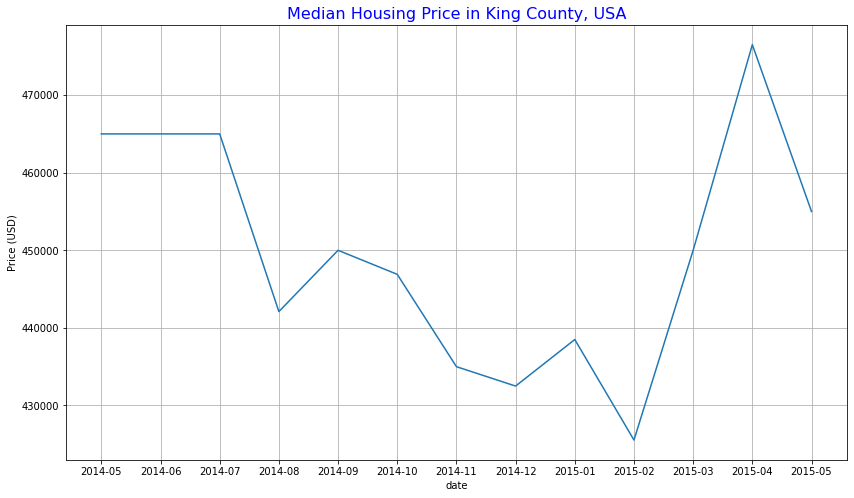

In [60]:
med_price_month = data.groupby(data['date'].dt.strftime('%Y-%m'))['price'].median()
plt.figure(figsize=(14, 8))
plt.title('Median Housing Price in King County, USA', fontsize=16, color='b')
sns.lineplot(x=med_price_month.index, y=med_price_month.values)

plt.ylabel('Price (USD)')
plt.grid()

> Grafik di atas menunjukkan median harga perumahan yang ada di King County, USA di setap bulannya dan jika dilihat trennya mengalami penurunan dari pertengahan tahun 2014 hingga awal tahun 2015 kemudian mengalami lonjakan kenaikan yang signifikan hingga pertengahan tahun 2015.

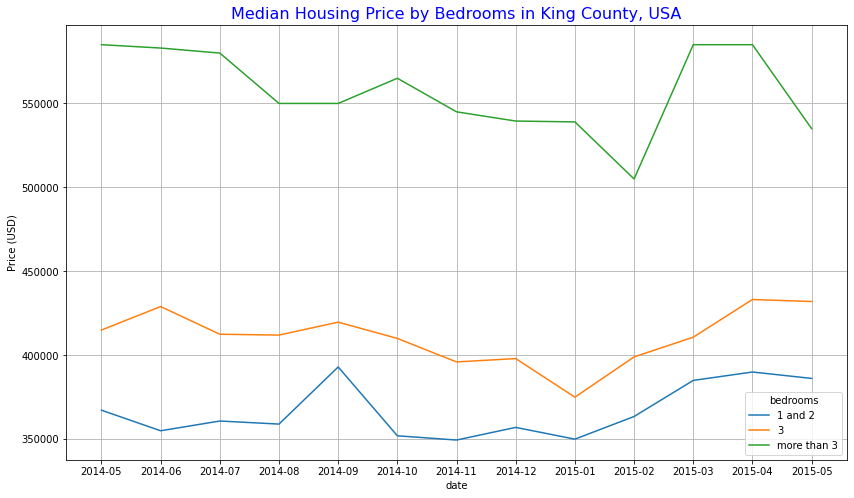

In [134]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

dpbed = data[['date', 'price', 'bedrooms']]
dpbed.loc[:, 'bedrooms'] = dpbed['bedrooms'].apply(lambda x: '1 and 2' if (x == 1)|(x == 2) else '3' if x == 3 else 'more than 3')
dpbed_group = dpbed.groupby([dpbed['date'].dt.strftime('%Y-%m'), 'bedrooms'])['price'].median().reset_index()

plt.figure(figsize=(14, 8))
plt.title('Median Housing Price by Bedrooms in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=dpbed_group, hue='bedrooms')
plt.ylabel('Price (USD)')
plt.grid()

 > Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan jumlah bedrooms dibagi menjadi 3 bagian yaitu 1 dan 2, 3, dan lebih dari 3 bedrooms. Terlihat bahwa housing yang memiliki lebih dari 3 bedrooms memiliki harga dua kali lipat lebih tinggi dibandingkan dengan 3 bedrooms. Sedangkan untuk tren harganya mengalami penurunan dari pertengahan tahun 2014 hingga awal tahun 2015 kemudian mengalami lonjakan kenaikan hingga pertengahan tahun 2015.

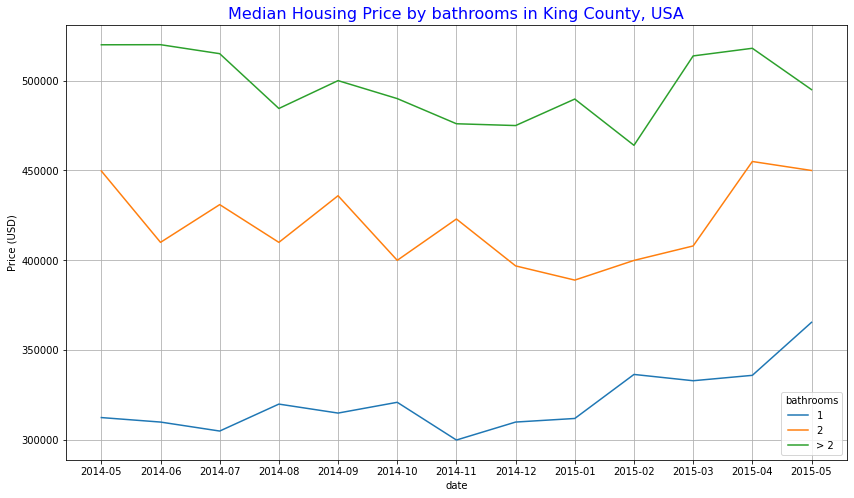

In [135]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

dpbath = data[['date', 'price', 'bathrooms']]
dpbath.loc[:, 'bathrooms'] = dpbath['bathrooms'].apply(lambda x: '1' if (x == 1) else '2' if x == 2 else '> 2')
dpbath_group = dpbath.groupby([dpbath['date'].dt.strftime('%Y-%m'), 'bathrooms'])['price'].median().reset_index()

plt.figure(figsize=(14, 8))
plt.title('Median Housing Price by bathrooms in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=dpbath_group, hue='bathrooms')
plt.ylabel('Price (USD)')
plt.grid()

 > Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan jumlah bathrooms dibagi menjadi 3 bagian yaitu 1, 2 dan > 2. Terlihat ada perbedaan housing yang memiliki bathrooms 1, 2, dan lebih dari 2. Sedangkan untuk tren harganya housing dengan lebih dari 1 bathrooms mengalami penurunan dari pertengahan tahun 2014 hingga awal tahun 2015 kemudian mengalami lonjakan kenaikan hingga pertengahan tahun 2015.

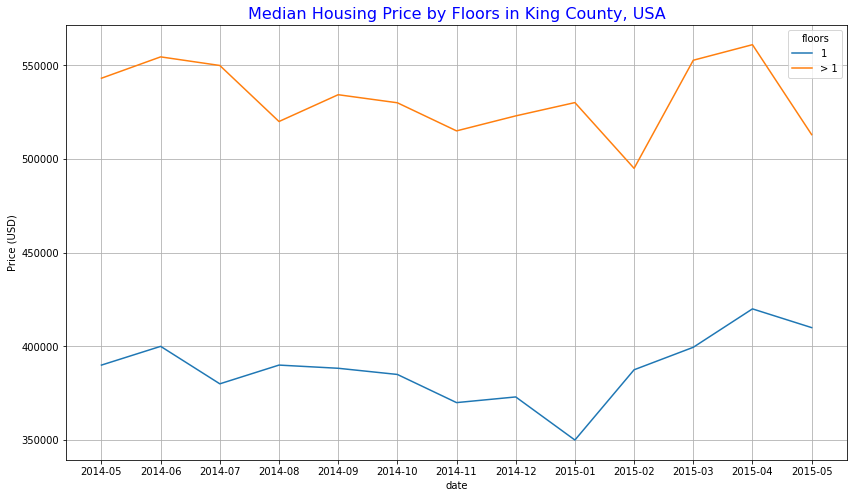

In [61]:
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

dpf = data[['date', 'price', 'floors']]
dpf.loc[:, 'floors'] = dpf['floors'].apply(lambda x: '1' if x == 1 else '> 1')
dpf_group = dpf.groupby([dpf['date'].dt.strftime('%Y-%m'), 'floors'])['price'].median().reset_index()

plt.figure(figsize=(14, 8))
plt.title('Median Housing Price by Floors in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=dpf_group, hue='floors')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan floors (jumlah tingkat bangunan). Terlihat bahwa harga perumahan yang memiliki tingkat lebih dari 1 lantai lebih mahal daripada bangunan dengan 1 lantai. Sedangkan untuk trennya masih sama yaitu mengalami penurunan dari pertengah 2014 hingga awal tahun 2015 lalu mengalami kenaikan hingga pertengahan tahun 2015.

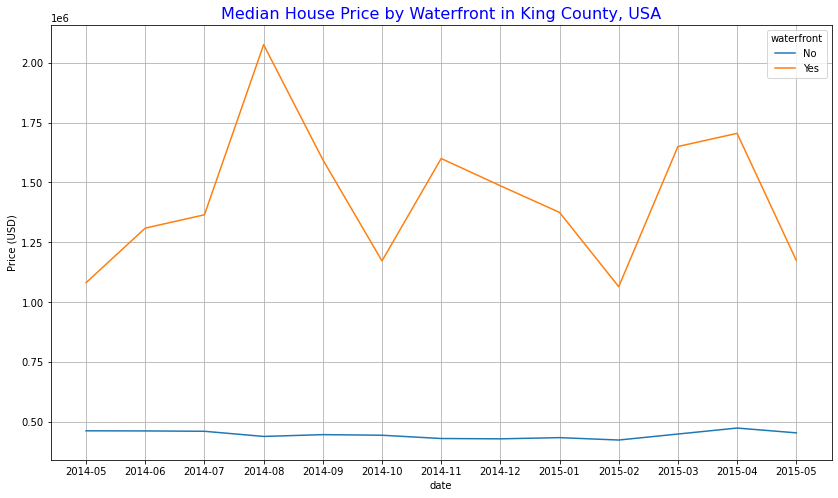

In [62]:
waterfront_price = data.groupby([data['date'].dt.strftime('%Y-%m'), 'waterfront'])['price'].median().reset_index()
waterfront_price['waterfront'].replace({0: 'No', 1: 'Yes'}, inplace=True)
plt.figure(figsize=(14, 8))
plt.title('Median House Price by Waterfront in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=waterfront_price, hue='waterfront')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan waterfront atau view menghadap pantai. Harga perumahan dengan view menghadap pantai lebih mahal dibandingkan harga perumahan yang tidak memilki view menghadap pantai.

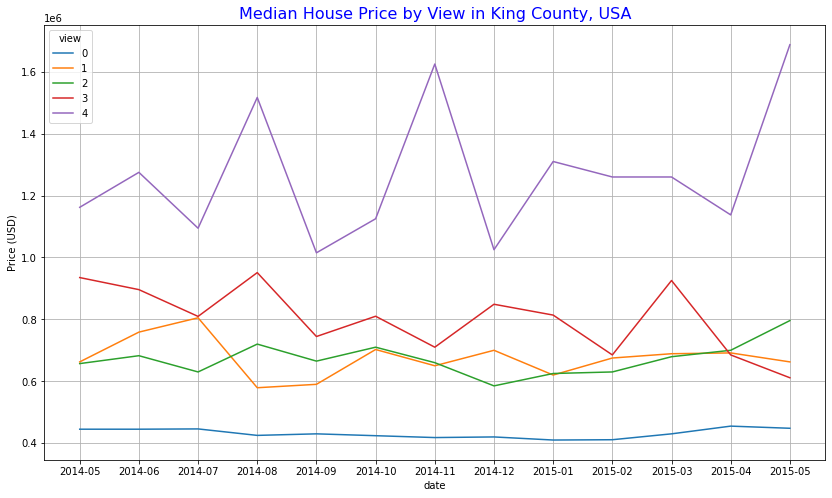

In [63]:
view_price = data.groupby([data['date'].dt.strftime('%Y-%m'), 'view'])['price'].median().reset_index()
plt.figure(figsize=(14, 8))
plt.title('Median House Price by View in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=view_price, hue='view', palette='tab10')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dengan perbedaan rating view. View yang memiliki pemandangan lebih indah memiliki harga lebih mahal dibandingkan dengan rumah yang memiliki view biasa saja atau bahkan kurang.

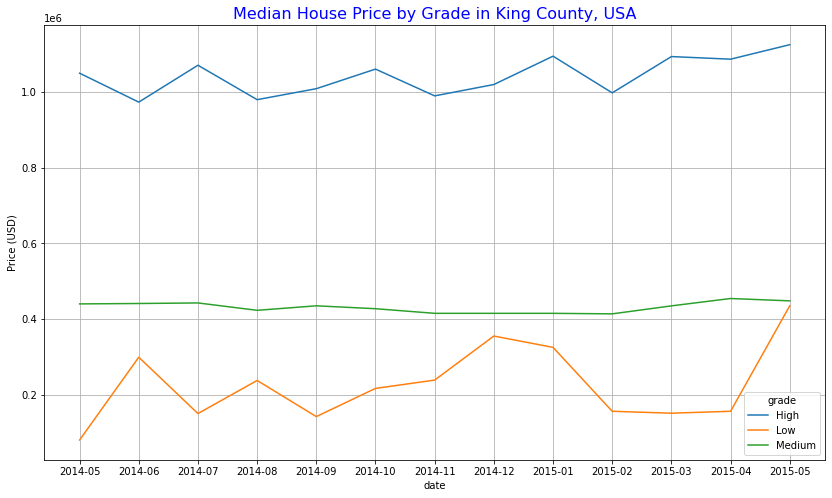

In [64]:
hilo_grade = data[['date', 'price', 'grade']]
hilo_grade['grade'] = hilo_grade['grade'].apply(lambda x: 'High' if x > 9 else 'Medium' if x > 4 else 'Low')
grade_price = hilo_grade.groupby([hilo_grade['date'].dt.strftime('%Y-%m'), 'grade'])['price'].median().reset_index()

plt.figure(figsize=(14, 8))
plt.title('Median House Price by Grade in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=grade_price, hue='grade')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan grade atau kualitas konstruksi bangunan dan desain. Bangunan dengan grade yang tinggi lebih mahal sekitar dua kali lipat dari harga perumahan dengan grade medium. Sedangkan grade yang rendah memiliki rata-rata harga setengah dari harga perumahan dengan grade medium.

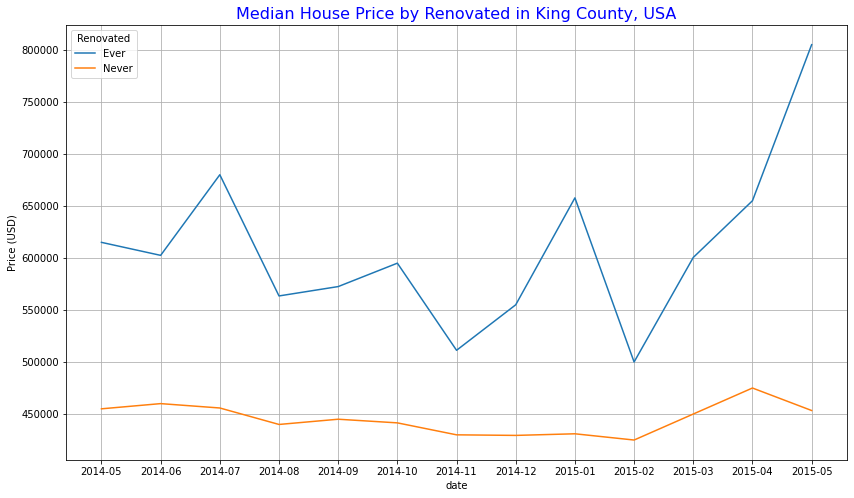

In [65]:
dp_Renovated = data[['date', 'price', 'yr_renovated']].rename(columns={'yr_renovated': 'Renovated'})
dp_Renovated['Renovated'] = dp_Renovated['Renovated'].apply(lambda x: 'Ever' if x > 0 else 'Never')
Renovated_price = dp_Renovated.groupby([dp_Renovated['date'].dt.strftime('%Y-%m'), 'Renovated'])['price'].median().reset_index()

plt.figure(figsize=(14, 8))
plt.title('Median House Price by Renovated in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=Renovated_price, hue='Renovated')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan renovated (pernah direnovasi atau tidak). Terlihat bahwa harga perumahan yang pernah direnovasi memiliki harga yang lebih mahal dibandingkan dengan yang tidak pernah direnovasi.

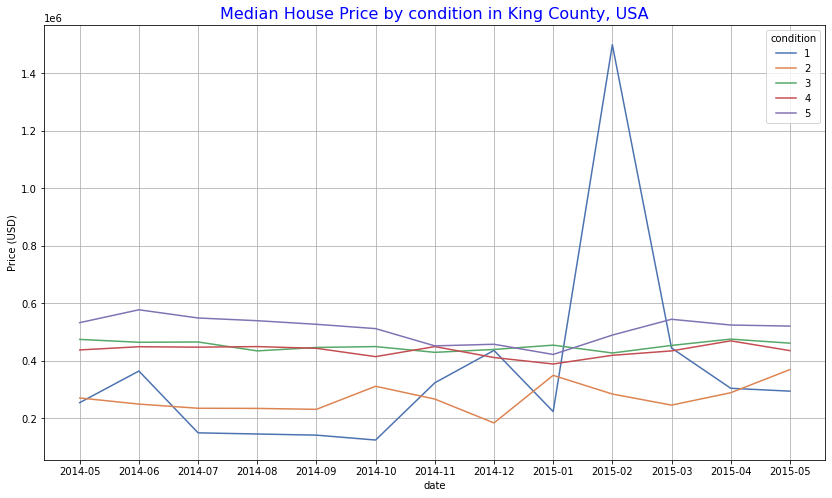

In [66]:
condition_price = data.groupby([data['date'].dt.strftime('%Y-%m'), 'condition'])['price'].median().reset_index()
plt.figure(figsize=(14, 8))
plt.title('Median House Price by condition in King County, USA', fontsize=16, color='b')
sns.lineplot(x='date', y='price', data=condition_price, hue='condition', palette='deep')
plt.ylabel('Price (USD)')
plt.grid()

> Berdasarkan grafik di atas menunjukkan perbedaan median harga perumahan di King County, USA dari waktu ke waktu berdasarkan condition. Perumahan yang memiliki kondisi bagus memiiki rata-rata harga yang lebih mahal dibandingkan dengan perumahan dengan kondisi biasa saja atau buruk.

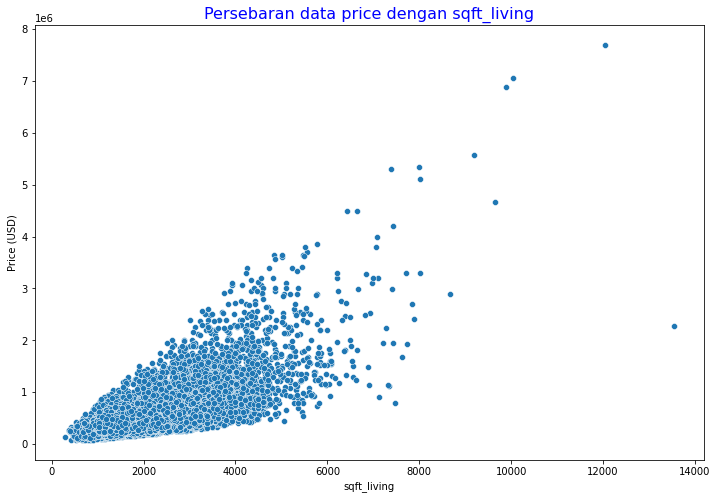

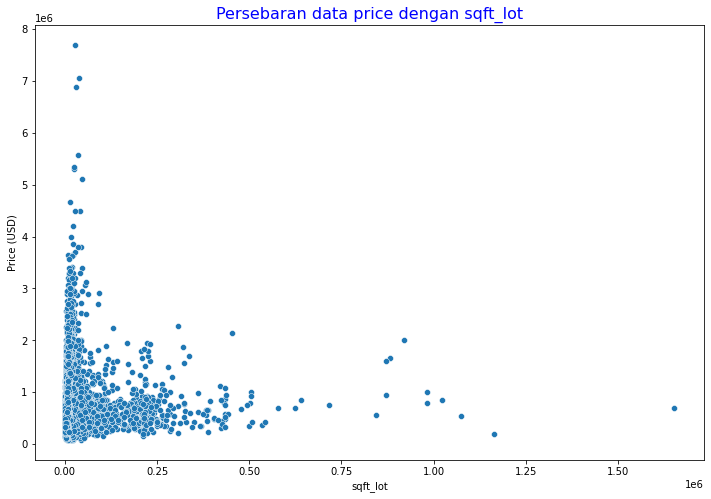

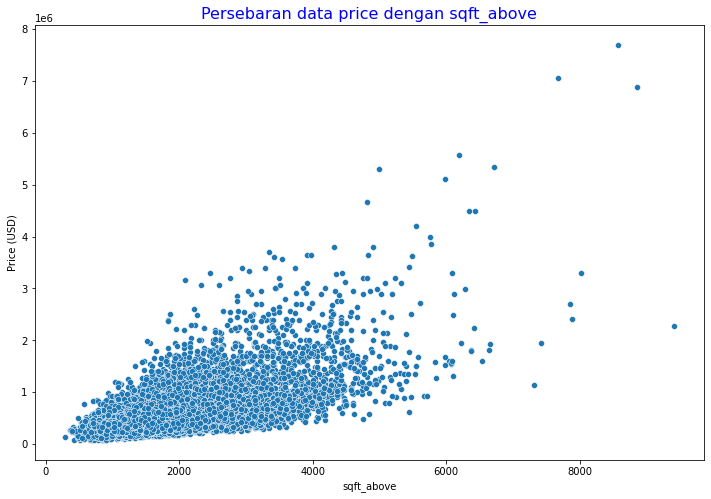

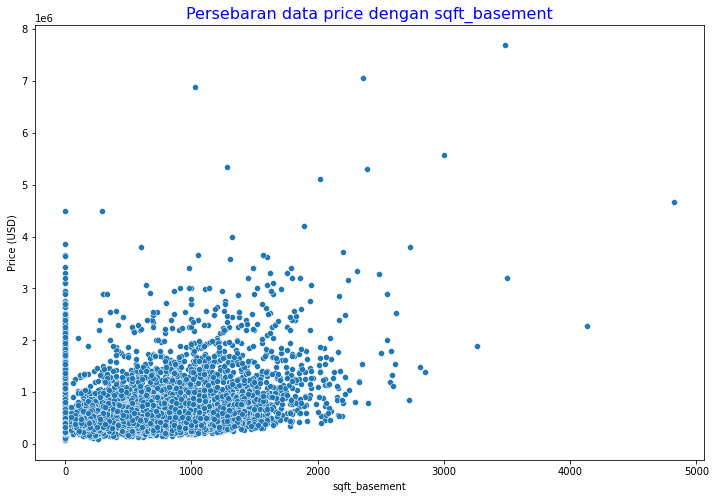

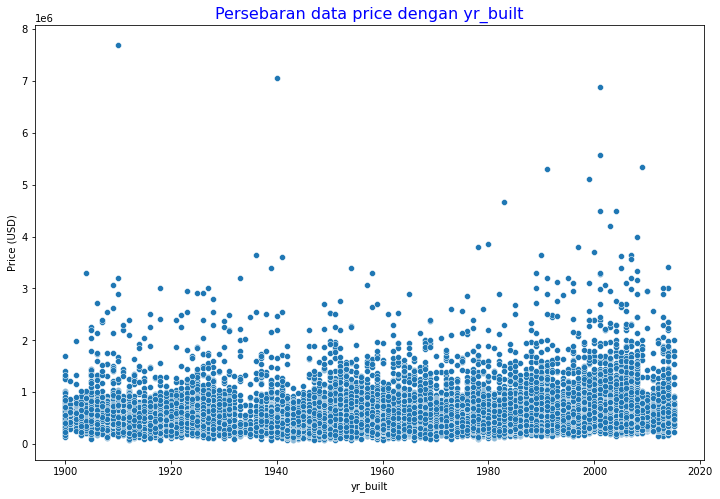

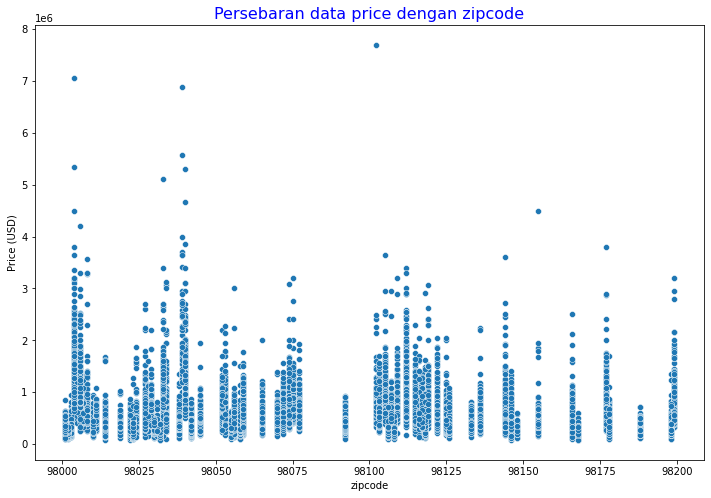

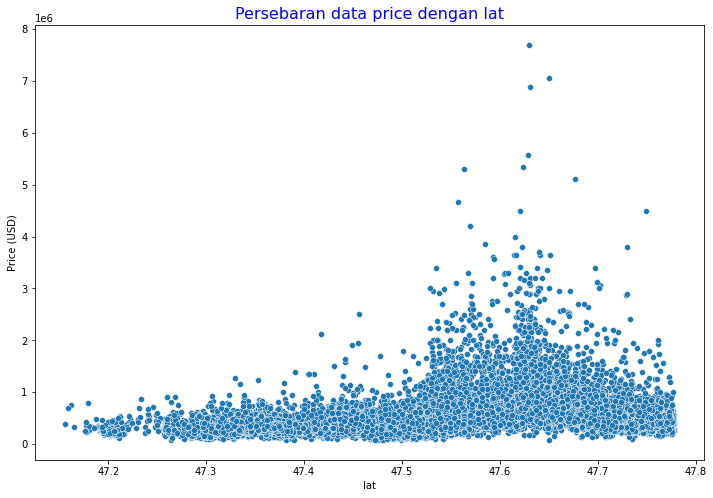

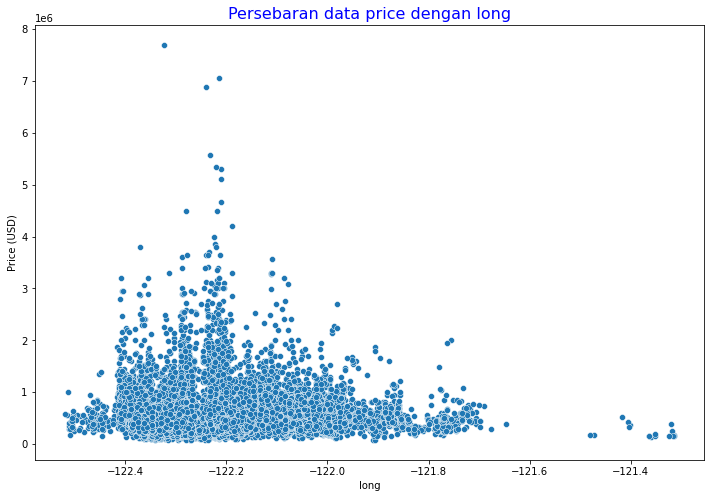

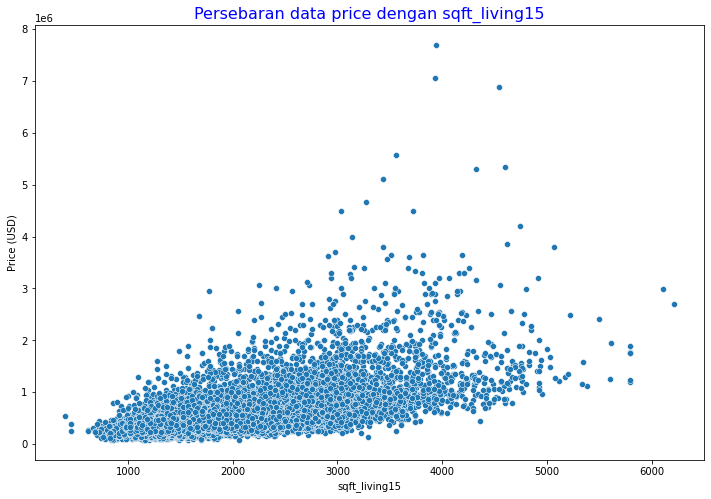

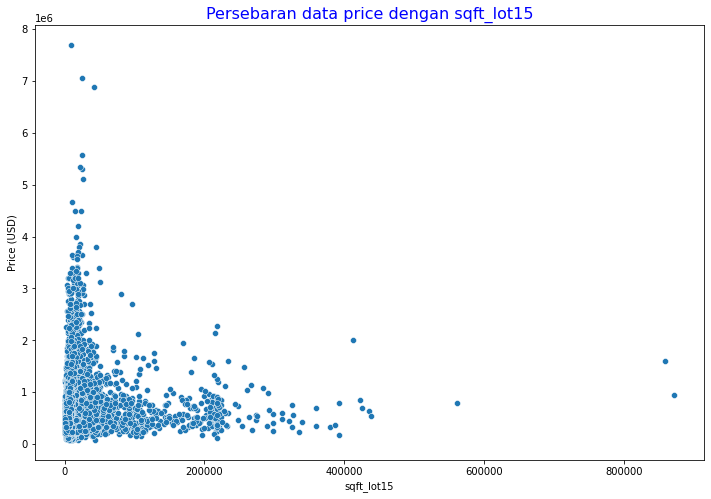

In [67]:
for col in data.columns:
    if col not in ['id', 'date', 'price', 'yr_renovated']:
        if col not in cat_col:
            plt.figure(figsize=(12, 8))
            sns.scatterplot(x=col, y='price', data=data)
            plt.ylabel('Price (USD)')
            plt.title(f'Persebaran data price dengan {col}', fontsize=16, color='b')

> Berdasarkan plot scatter di atas antara label price dengan maasing-masing fitur numerik mayoritas menunjukkan adanya korelasi positif terutama untuk fitur-fitur seperti, sqft_living, sqft_above, sqft_basement, dan sqft_living15. Sedangkan untuk fitur sisanya menunjukkan korelasi yang lemah.

## V. Data Preprocessing

Membuat data inference dari dataset misalnya sebanyak 7 buah.

In [6]:
data_inf = data.sample(7, random_state=7)

Drop baris dataset yang sudah digunakan untuk data inferensial.

In [7]:
data.drop(data_inf.index, inplace=True)

Reset index untuk dataset dan data inferensial.

In [8]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Splitting Data

Split menggunakan train test split dengan sampel test misalnya 20%.

In [9]:
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Feature Selection

Drop fitur yang tidak dibutuhkan yaitu id, date, dan zipcode. Id hanya seperti nama dimana tidak memiliki hubungan dengan price, date dapat didrop karena tidak memiliki hubungan yang kuat dengan price dan zipcode sama seperti nama wilayah dan terwakili oleh latitude dan longitude.

In [10]:
X_train.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)
X_test.drop(['id', 'date', 'zipcode'], axis=1, inplace=True)

### Handling Outliers

In [11]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,17284.000000,17284.000000,17284.000000,1.728400e+04,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000,17284.000000
mean,3.374798,2.117160,2082.347894,1.509312e+04,1.496326,0.007521,0.233626,3.409570,7.657429,1791.801435,290.546459,1970.977378,83.477725,47.559666,-122.213821,1988.145279,12762.646031
std,0.935706,0.770133,916.060490,4.063841e+04,0.540230,0.086402,0.765082,0.649982,1.175524,829.124156,441.592725,29.478577,399.549923,0.138605,0.140567,686.316672,26702.393532
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,460.000000,651.000000
25%,3.000000,1.750000,1430.000000,5.059500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,47.470300,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1920.000000,7.630500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.570650,-122.231000,1840.000000,7626.000000
75%,4.000000,2.500000,2550.000000,1.073125e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.677125,-122.125000,2360.000000,10101.000000
max,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,858132.000000


Mayoritas atau hampir semua fitur memiliki outlier dan dengan mayoritas jumlahnya yang cukup banyak, apabila jika dilihat dari deskripsi data, nilainya cukup rasional dan dapat dipertahankan sehingga dalam hal ini tidak dilakukan handling outlier untuk mempertahankan distribusi data aslinya.

### Handling Missing Values

Langkah ini dapat dilewati karena tidak terdapat missing value.

In [12]:
X_train.isna().sum().sum()

0

### Feature Encoding

In [13]:
X_train.select_dtypes(include=['object', 'category']).columns.to_list()

[]

Proses ini dapat dilewati karena semua fitur kategorik sudah menjadi numerik.

### Feature Scalling

Digunakan Robustscaler untuk scalling data karena mayoritas data bersifat skew dan terdapat banyak outlier. 

In [14]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## VI. Model Definition

* Mendefinisikan model regresi yang digunakan yaitu:
    - Random Forest Regressor
    - Extra Trees Regressor
    - Gradient Boosting Regressor
    - Histogram-based Gradient Boosting Regressor

In [15]:
randfor = RandomForestRegressor()
xtrees = ExtraTreesRegressor()
gboost = GradientBoostingRegressor()
histg = HistGradientBoostingRegressor()

Setelah pendefinisian model dilakukan cross validation untuk menghitung evaluasi metrik dari baseline model agar metrik yang dihasilkan valid.

Cross validation untuk random forest regressor.

In [16]:
%%time
train_cv_randfor = cross_validate(
    randfor, 
    X_train_scaled, 
    y_train, 
    cv=7, 
    scoring=['r2', 'neg_root_mean_squared_error']
)

CPU times: user 1min 8s, sys: 403 ms, total: 1min 8s
Wall time: 1min 8s


Cross validation untuk extra trees regressor.

In [17]:
%%time
train_cv_xtrees = cross_validate(
    xtrees, 
    X_train_scaled, 
    y_train, 
    cv=7, 
    scoring=['r2', 'neg_root_mean_squared_error']
)

CPU times: user 31.7 s, sys: 496 ms, total: 32.2 s
Wall time: 32.2 s


Cross validation untuk gradient boosting regressor.

In [18]:
%%time
train_cv_gboost = cross_validate(
    gboost, 
    X_train_scaled, 
    y_train, 
    cv=7, 
    scoring=['r2', 'neg_root_mean_squared_error']
)

CPU times: user 20.6 s, sys: 0 ns, total: 20.6 s
Wall time: 20.6 s


Cross validation untuk histogram based gradient boosting regressor.

In [19]:
%%time
train_cv_histg = cross_validate(
    histg, 
    X_train_scaled, 
    y_train, 
    cv=7, 
    scoring=['r2', 'neg_root_mean_squared_error']
)

CPU times: user 40 s, sys: 192 ms, total: 40.1 s
Wall time: 5.48 s


Hasil dari metrik baseline model dapat dilihat pada bagian model evaluation yang dibandingkan dengan metrik hasil prediksi data test.

## VII. Model Training

Melakukan training terhadap data train untuk setiap model.

In [20]:
randfor.fit(X_train_scaled, y_train)
xtrees.fit(X_train_scaled, y_train)
gboost.fit(X_train_scaled, y_train)
histg.fit(X_train_scaled, y_train)

HistGradientBoostingRegressor()

Coba memprediksi data test untuk setiap model.

In [21]:
y_pred_test_randfor = randfor.predict(X_test_scaled)
y_pred_test_xtrees = xtrees.predict(X_test_scaled)
y_pred_test_gboost = gboost.predict(X_test_scaled)
y_pred_test_histg = histg.predict(X_test_scaled)

### Hyperparameter Tuning

* Pipeline

Dilakukan hyperparameter tuning untuk model extra trees. Sebelum dilakukan hyperparameter tuning, kita mengemas seluruh langkah preprocessing dan pemodelan dalam sebuah pipeline dan menjadi estimator bagi gridsearchCV. Proses gridsearchcv bukan menggunakan model base parameternya melainkan menggunakan pipeline karena dalam proses gridsearchCV akan memecah (split) data train dimana data tersebut seharusnya belum discalling sehingga saat dilakukan gridsearchcv proses yang dilakukan adalah split terlebih dahulu baru kemudian scalling data.

In [22]:
pipe = Pipeline(
    [
        ("scaler", scaler), 
        ("xtrees", xtrees)
    ]
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('xtrees', ExtraTreesRegressor())])

Menentukan list value hyperparameter yang ingin dituning.

In [31]:
param_grid = {
    'xtrees__n_estimators': [10, 50, 100, 150],
    'xtrees__min_samples_split': [2, 3],
    'xtrees__max_features' : ['auto', 'sqrt', 'log2'],
    'xtrees__n_jobs': [-1]
    }

param_grid

{'xtrees__n_estimators': [10, 50, 100, 150],
 'xtrees__min_samples_split': [2, 3],
 'xtrees__max_features': ['auto', 'sqrt', 'log2'],
 'xtrees__n_jobs': [-1]}

Melakukan tuning GridSearchCV untuk pipeline.

In [ ]:
# Train with Grid Search
gridcv = GridSearchCV(
    estimator=pipe, 
    param_grid=param_grid, 
    cv=7, 
    n_jobs=-1, 
    verbose=2
)

gridcv.fit(X_train_scaled, y_train)

Melihat hyperparameter yang didapatkan.

In [33]:
gridcv.best_params_

{'xtrees__max_features': 'auto',
 'xtrees__min_samples_split': 3,
 'xtrees__n_estimators': 100,
 'xtrees__n_jobs': -1}

* Final Pipeline

Menerapkan best parameter ke dalam pipeline baru.

In [34]:
xtrees_best = ExtraTreesRegressor(
    max_features=gridcv.best_params_['xtrees__max_features'],
    min_samples_split=gridcv.best_params_['xtrees__min_samples_split'],
    n_estimators=gridcv.best_params_['xtrees__n_estimators'],
    n_jobs=gridcv.best_params_['xtrees__n_jobs']
)

pipe_best = Pipeline(
    [
        ("scaler", scaler), 
        ("xtrees", xtrees_best)
    ]
)

pipe_best.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('xtrees',
                 ExtraTreesRegressor(min_samples_split=3, n_jobs=-1))])

Mengeluarkan prediksi model GridSearchCV dengan data test.

In [35]:
y_pred_test_gridcv = gridcv.predict(X_test_scaled)

## VIII. Model Evaluation

In [36]:
def print_cv(cv, y_pred_test_name):
    r2_mean = cv['test_r2'].mean()
    r2_std = cv['test_r2'].std()
    print('R2-Range of Test-Set         : {:.4f} to {:.4f}'.format(r2_mean-r2_std, r2_mean+r2_std))
    print('R2-Mean - Cross Validation   : {:.4f}'.format(r2_mean))
    print('R2 X_test                    : {:.4f}'.format(r2_score(y_test, y_pred_test_name)))
    rmse_mean = abs(cv['test_neg_root_mean_squared_error'].mean())
    rmse_std = abs(cv['test_neg_root_mean_squared_error'].std())
    print('RMSE-Range of Test-Set       : {:.0f} to {:.0f}'.format(rmse_mean-rmse_std, rmse_mean+rmse_std))
    print('RMSE-Mean - Cross Validation : {:.0f}'.format(rmse_mean))
    print('RMSE X_test                  : {:.0f}'.format(mean_squared_error(y_test, y_pred_test_name)**0.5))


In [37]:
print('Random Forest Regressor '); print_cv(train_cv_randfor, y_pred_test_randfor); print('='*50)
print('Extra Trees Regressor '); print_cv(train_cv_xtrees, y_pred_test_xtrees); print('='*50)
print('Gradient Boosting Regressor '); print_cv(train_cv_gboost, y_pred_test_gboost); print('='*50)
print('Histogram-based Gradient Boosting Regressor '); print_cv(train_cv_histg, y_pred_test_histg); print('='*50)

Random Forest Regressor 
R2-Range of Test-Set         : 0.8611 to 0.8853
R2-Mean - Cross Validation   : 0.8732
R2 X_test                    : 0.8682
RMSE-Range of Test-Set       : 119317 to 140515
RMSE-Mean - Cross Validation : 129916
RMSE X_test                  : 135918
Extra Trees Regressor 
R2-Range of Test-Set         : 0.8708 to 0.8833
R2-Mean - Cross Validation   : 0.8770
R2 X_test                    : 0.8699
RMSE-Range of Test-Set       : 122202 to 133519
RMSE-Mean - Cross Validation : 127861
RMSE X_test                  : 135053
Gradient Boosting Regressor 
R2-Range of Test-Set         : 0.8521 to 0.8759
R2-Mean - Cross Validation   : 0.8640
R2 X_test                    : 0.8618
RMSE-Range of Test-Set       : 124535 to 144515
RMSE-Mean - Cross Validation : 134525
RMSE X_test                  : 139195
Histogram-based Gradient Boosting Regressor 
R2-Range of Test-Set         : 0.8590 to 0.8995
R2-Mean - Cross Validation   : 0.8792
R2 X_test                    : 0.9018
RMSE-Range

> Berdasarkan evaluasi di atas dapat terlihat bahwa model baseline terbaik dengan rata-rata $R^2$ tertinggi adalah histogram-based, namun karena deviasinya lebih besar dari extra trees regressor disini dipilih model extra trees regressor sebagai model terbaik kedua dengan rata-rata $R^2$ sekitar 0.8770 dengan rentang yang mungkin adalah dari 0.8667 hingga 0.8890. Ini berarti fitur yang digunakan dapat menjelaskan label y sebesar 87.7% dengan model regresi extra trees.

Sekarang dari baseline model terbaik, dilakukan hyperparameter tuning untuk mencari hyparameter terbaik yang digunakan agar performa model meningkat. Kembali ke bagian model training.

### Hyperparameter Tuning Evaluation

Dari bagian hyperparameter tuning didapatkan prediksi atas data test dengan nama y_pred_test_gridcv. Sekarang coba kita hitung nilai $R^2$ dan RMSE untuk y_pred_test_gridcv.

In [38]:
print('Extra Trees Regressor - R2 Score')
print('(Before Tuning) Baseline-Testing      : {:.4f}'.format(r2_score(y_test, y_pred_test_xtrees)))
print('(After  Tuning) GridSearchCV Testing  : {:.4f}'.format(r2_score(y_test, y_pred_test_gridcv)))

Extra Trees Regressor - R2 Score
(Before Tuning) Baseline-Testing      : 0.8699
(After  Tuning) GridSearchCV Testing  : 0.8669


> Berdasarkan skor determinasi $R^2$, model setelah dilakukan hyperparameter tuning dengan GridSearchCV mengalami sedikit penurunan $R^2$ namun masih berada dalam performa yang bagus.

In [39]:
print('Extra Trees Regressor - RMSE')
print('(Before Tuning) Baseline-Testing      : {:.0f}'.format(mean_squared_error(y_test, y_pred_test_xtrees)**0.5))
print('(After  Tuning) GridSearchCV Testing  : {:.0f}'.format(mean_squared_error(y_test, y_pred_test_gridcv)**0.5))

Extra Trees Regressor - RMSE
(Before Tuning) Baseline-Testing      : 135053
(After  Tuning) GridSearchCV Testing  : 136627


> Berdasarkan skor RMSE, model yang dilakukan hyperparameter tuning dengan GridSearchCV mengalami sedikit kenaikan RMSE namun hal ini masih berada dekat dengan performa awal.

## IX. Model Saving

### Pipeline

Load model pipeline dari path.

In [40]:
# simpan model
with open("deployment/pipe_best.pkl", "wb") as f:
  pickle.dump(pipe_best, f)

## X. Model Inference


Load data inference.

In [41]:
data_inf

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1944900090,2014-05-19,462000.0,5,1.75,1250,10530,1.0,0,0,...,7,1250,0,1966,0,98007,47.6101,-122.138,1560,8190
1,2597520900,2014-08-04,768000.0,3,2.50,2660,10928,2.0,0,0,...,9,1830,830,1988,0,98006,47.5442,-122.141,2800,10025
2,4141800030,2014-10-14,920000.0,3,1.75,2480,4000,1.0,0,0,...,8,1240,1240,1948,2014,98122,47.6150,-122.288,2450,4000
3,301400830,2014-12-23,263000.0,3,2.50,1584,3200,2.0,0,0,...,7,1584,0,2011,0,98002,47.3451,-122.215,1584,2800
4,1776230180,2014-10-08,427500.0,4,2.50,2430,3249,2.0,0,0,...,8,2430,0,2010,0,98059,47.5048,-122.155,2650,3844
5,8943600360,2015-02-19,299000.0,3,2.25,1350,3582,2.0,0,0,...,8,1350,0,2010,0,98031,47.4214,-122.191,1940,3860
6,7852140040,2014-08-25,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731


### Feature Selection

Hapus target label dan fitur yang tidak digunakan sesuai X_train.

In [42]:
data_inf.drop(['id', 'date', 'zipcode', 'price'], axis=1, inplace=True)

### Model Prediction

Kita lakukan prediksi dengan model terbaik yaitu extra trees yang sudah dilakukan hyperparameter tuning.

In [43]:
with open('deployment/pipe_best.pkl', 'rb') as f:
    pipemodel = pickle.load(f)

In [44]:
np.round(pipemodel.predict(data_inf))

array([454194., 750482., 837127., 264815., 454520., 280228., 533136.])

## XI. Kesimpulan

1. Dataset yang digunakan adalah kc_house_data.csv dari [kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) yaitu harga perumahan di King County, USA.
2. Prediksi harga perumahahan menggunakan regression dengan model sebagai berikut:
    - Random Forest Regressor
    - Extra Trees Regressor
    - Gradient Boosting Regressor
    - Histogram-based Gradient Boosting Regressor
3. Fitur yang tidak digunakan adalah id, date, dan zipcode.
4. Model terbaik untuk digunakan berdasarkan baseline hyperparameter adalah Extra Trees Regressor dengan rata-rata $R^2$ cross validation sekitar 0.8770. Ini artinya target/label y dapat dijelaskan oleh fitur independent sebesar 87.7%.
7. Hyperparameter tuning Extra Trees didapatkan best parameternya adalah sebagai berikut:
    - 'max_features': 'auto',
    - 'min_samples_leaf': 1,
    - 'min_samples_split': 3,
    - 'n_estimators': 150,
8. Model Extra Trees Regressor dengan hyperparameter tuning GridSearchCV menghasilkan sedikit penurunan performa diukur dari skor determinasi $R^2$ dan sedikit mengalami kenaikan jika diukur dari skor Root Mean Square Error (RMSE). Tetapi hal ini masih berada sangat dekat dengan performa awal sebelum tuning.